<a href="https://colab.research.google.com/github/MonsterHorn/MachineLearning/blob/main/%E5%86%B3%E7%AD%96%E6%A0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 决策树

## 1. 简介
  决策树(Decision Tree）是**在已知各种情况发生概率**的基础上，通过构成决策树来求取净现值的期望值大于等于零的概率，评价项目风险，判断其可行性的决策分析方法，是直观运用概率分析的一种图解法。由于这种决策分支画成图形很像一棵树的枝干，故称决策树。

  在机器学习中，决策树是一个预测模型，他代表的是对象属性与对象值之间的一种映射关系。Entropy = 系统的凌乱程度，使用算法ID3, C4.5和C5.0生成树算法使用熵。这一度量是基于信息学理论中熵的概念。


决策树是一种树形结构，其中每个内部节点表示一个属性上的测试，每个分支代表一个测试输出，每个叶节点代表一种类别。


分类树（决策树）是一种十分常用的分类方法。它是一种监督学习，所谓监督学习就是给定一堆样本，每个样本都有一组属性和一个类别，这些类别是事先确定的，那么通过学习得到一个分类器，这个分类器能够对新出现的对象给出正确的分类。这样的机器学习就被称之为监督学习

## 2. 决策树学习的 3 个步骤

- 特征选择

特征选择决定了使用哪些特征来做判断。在训练数据集中，每个样本的属性可能有很多个，不同属性的作用有大有小。因而特征选择的作用就是筛选出跟分类结果相关性较高的特征，也就是分类能力较强的特征。

在特征选择中通常使用的准则是：信息增益。

- 决策树生成

选择好特征后，就从根节点触发，对节点计算所有特征的信息增益，选择信息增益最大的特征作为节点特征，根据该特征的不同取值建立子节点；对每个子节点使用相同的方式生成新的子节点，直到信息增益很小或者没有特征可以选择为止。

- 决策树剪枝

剪枝的主要目的是对抗「过拟合」，通过主动去掉部分分支来降低过拟合的风险。

## 3. 问题

信息熵在高维数据容易过拟合

月亮型数据：最邻近算法、RBF支持向量机、高斯过程

环形数据：最邻近算法、高斯过程

对半分数据：朴素贝叶斯、神经网络、随机森林

In [ ]:
# 加载依赖
from sklearn import tree
from sklearn.datasets import load_wine # 导入sklearn自带的数据集
from sklearn.model_selection import train_test_split # 测试集和训练集的类
wine = load_wine()
# 查看数据
wine.data

In [ ]:
wine.target

In [ ]:
wine.feature_names

In [ ]:
wine.target_names

In [ ]:
wine.data.shape

In [ ]:
# 将标签和数据一起显示
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1) # 显示信息

In [6]:
# 分训练集和测试集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)# 三七分 测试集和训练集

In [ ]:
# 设定决策树的配置
clf = tree.DecisionTreeClassifier(criterion="entropy") # 使用交叉熵计算，默认gini
# 决策树的训练
clf = clf.fit(Xtrain,Ytrain)

In [ ]:
# 训练结果
score = clf.score(Xtest,Ytest) # 返回预测准确度
score

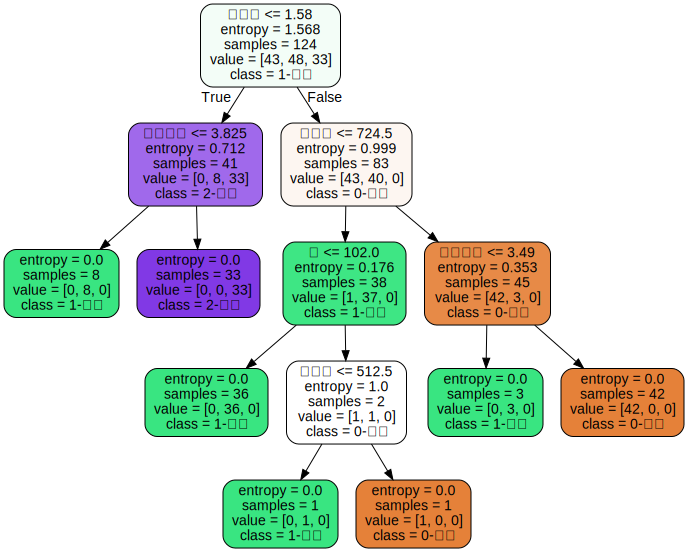

In [20]:
# 画图展示
import graphviz
feature_name = ['酒精','苹果酸','灰烬','灰的碱性','镁','总酚','类黄酮','非挥发性酚','原花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
# 图的配置
dot_data = tree.export_graphviz(
    clf # 分类器
    ,feature_names = feature_name # 特征名
    ,class_names = ["0-分类","1-分类","2-分类"] # 分类名
    ,filled = True # 填充颜色
    ,rounded = True # 圆角框
)
grough = graphviz.Source(dot_data)
grough

In [22]:
# 使用的特征
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.0240243 ,
       0.        , 0.42341123, 0.        , 0.        , 0.23191729,
       0.        , 0.        , 0.32064718])

In [24]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰烬', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.024024299242541423),
 ('总酚', 0.0),
 ('类黄酮', 0.42341122684370647),
 ('非挥发性酚', 0.0),
 ('原花青素', 0.0),
 ('颜色强度', 0.23191729319667936),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.3206471807170727)]

In [32]:
# 添加固定随机状态，使每次结果一样，防止随机性
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30) # 使用交叉熵计算，默认gini,固定随机状态使每次结果一样
# 决策树的训练
clf = clf.fit(Xtrain,Ytrain)
# 训练结果
score = clf.score(Xtest,Ytest) # 返回预测准确度
score

0.9444444444444444

In [40]:
# 分支不按照 特征的权重来分， 而是随机分配的，结果更加随机，节点更多，防止过拟合
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=35,splitter="random") # 使用交叉熵计算，默认gini,固定随机状态使每次结果一样
# 决策树的训练
clf = clf.fit(Xtrain,Ytrain)
# 训练结果
score = clf.score(Xtest,Ytest) # 返回预测准确度
score

0.9814814814814815

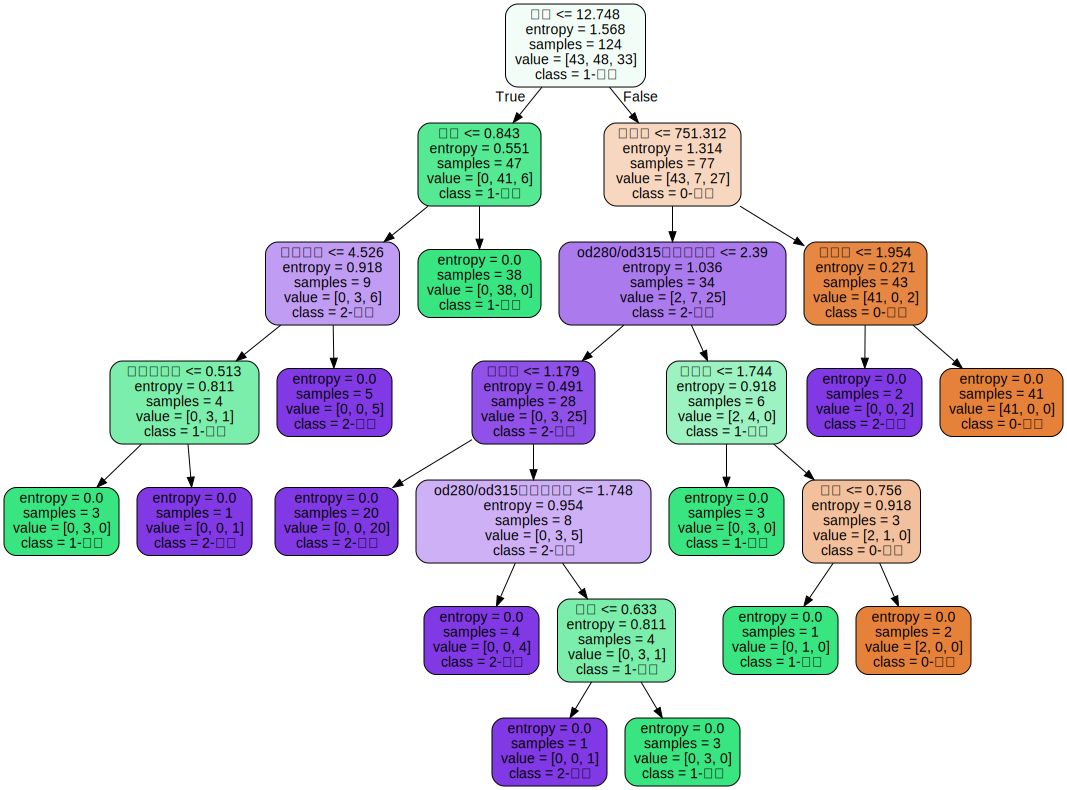

In [41]:
# 画图展示
import graphviz
feature_name = ['酒精','苹果酸','灰烬','灰的碱性','镁','总酚','类黄酮','非挥发性酚','原花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
# 图的配置
dot_data = tree.export_graphviz(
    clf # 分类器
    ,feature_names = feature_name # 特征名
    ,class_names = ["0-分类","1-分类","2-分类"] # 分类名
    ,filled = True # 填充颜色
    ,rounded = True # 圆角框
)
grough = graphviz.Source(dot_data)
grough

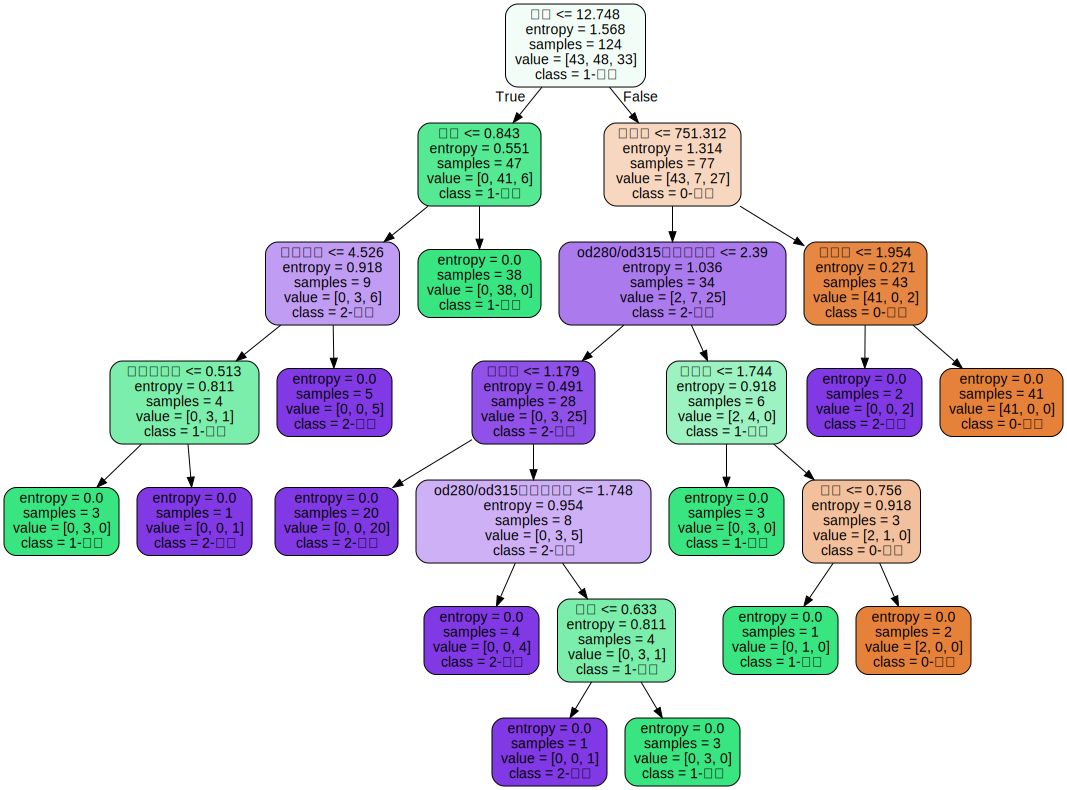

In [46]:
# 剪枝
clf = tree.DecisionTreeClassifier(
    criterion="entropy"   # 使用交叉熵计算，默认gini。
    ,random_state=35    # 固定随机状态使每次结果一样
    ,splitter="random"   # 随机特征
    # 剪枝策略
    # , max_depth = 3 # 超过三层 的剪枝
    # , min_samples_split = 25 # 小于 25 的 节点不再分叶子节点
    # , min_samples_leaf = 10 # 小于 10 的 叶子节点 剪枝
) 
# 决策树的训练
clf = clf.fit(Xtrain,Ytrain)

# 画图展示
import graphviz
feature_name = ['酒精','苹果酸','灰烬','灰的碱性','镁','总酚','类黄酮','非挥发性酚','原花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
# 图的配置
dot_data = tree.export_graphviz(
    clf # 分类器
    ,feature_names = feature_name # 特征名
    ,class_names = ["0-分类","1-分类","2-分类"] # 分类名
    ,filled = True # 填充颜色
    ,rounded = True # 圆角框
)
grough = graphviz.Source(dot_data)
grough


In [47]:
# 训练结果
score = clf.score(Xtest,Ytest) # 返回预测准确度
score

0.9814814814814815

<function matplotlib.pyplot.show>

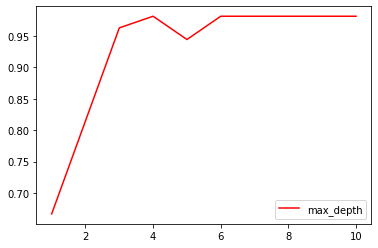

In [48]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(

        criterion="entropy"   # 使用交叉熵计算，默认gini。
        ,random_state=35    # 固定随机状态使每次结果一样
        ,splitter="random"   # 随机特征
        # 剪枝策略
        , max_depth = i + 1 # 超过三层 的剪枝
        # , min_samples_split = 25 # 小于 25 的 节点不再分叶子节点
        # , min_samples_leaf = 10 # 小于 10 的 叶子节点 剪枝
    ) 
    # 决策树的训练
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show